In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use("fivethirtyeight")
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv("kidney_disease.csv")

In [44]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [45]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [46]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [47]:
data["classification"].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [48]:
data.shape

(400, 26)

In [49]:
data.drop("id", axis=1, inplace=True)

In [50]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [51]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [52]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [53]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [54]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [56]:
data["packed_cell_volume"]

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [57]:
data["packed_cell_volume"] = pd.to_numeric(data["packed_cell_volume"], errors = "coerce")
data["white_blood_cell_count"] = pd.to_numeric(data["white_blood_cell_count"], errors = "coerce")
data["red_blood_cell_count"] = pd.to_numeric(data["red_blood_cell_count"], errors = "coerce")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [59]:
categorical_cols = [col for col in data.columns if data[col].dtype == "object"]
numerical_cols = [col for col in data.columns if data[col].dtype != "object"]

In [60]:
categorical_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [61]:
numerical_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [62]:
for col in categorical_cols:
    print(f"{col} has {data[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [63]:
data['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
data['class'] = data['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

/tmp/ipykernel_8458/1476023089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)


In [64]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {data[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has ['ckd' 'not ckd']


In [65]:
data["class"] = data["class"].map({"ckd":0, "not ckd":1})
data["class"] = pd.to_numeric(data["class"], errors = "coerce")

In [66]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {data[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has [0 1]


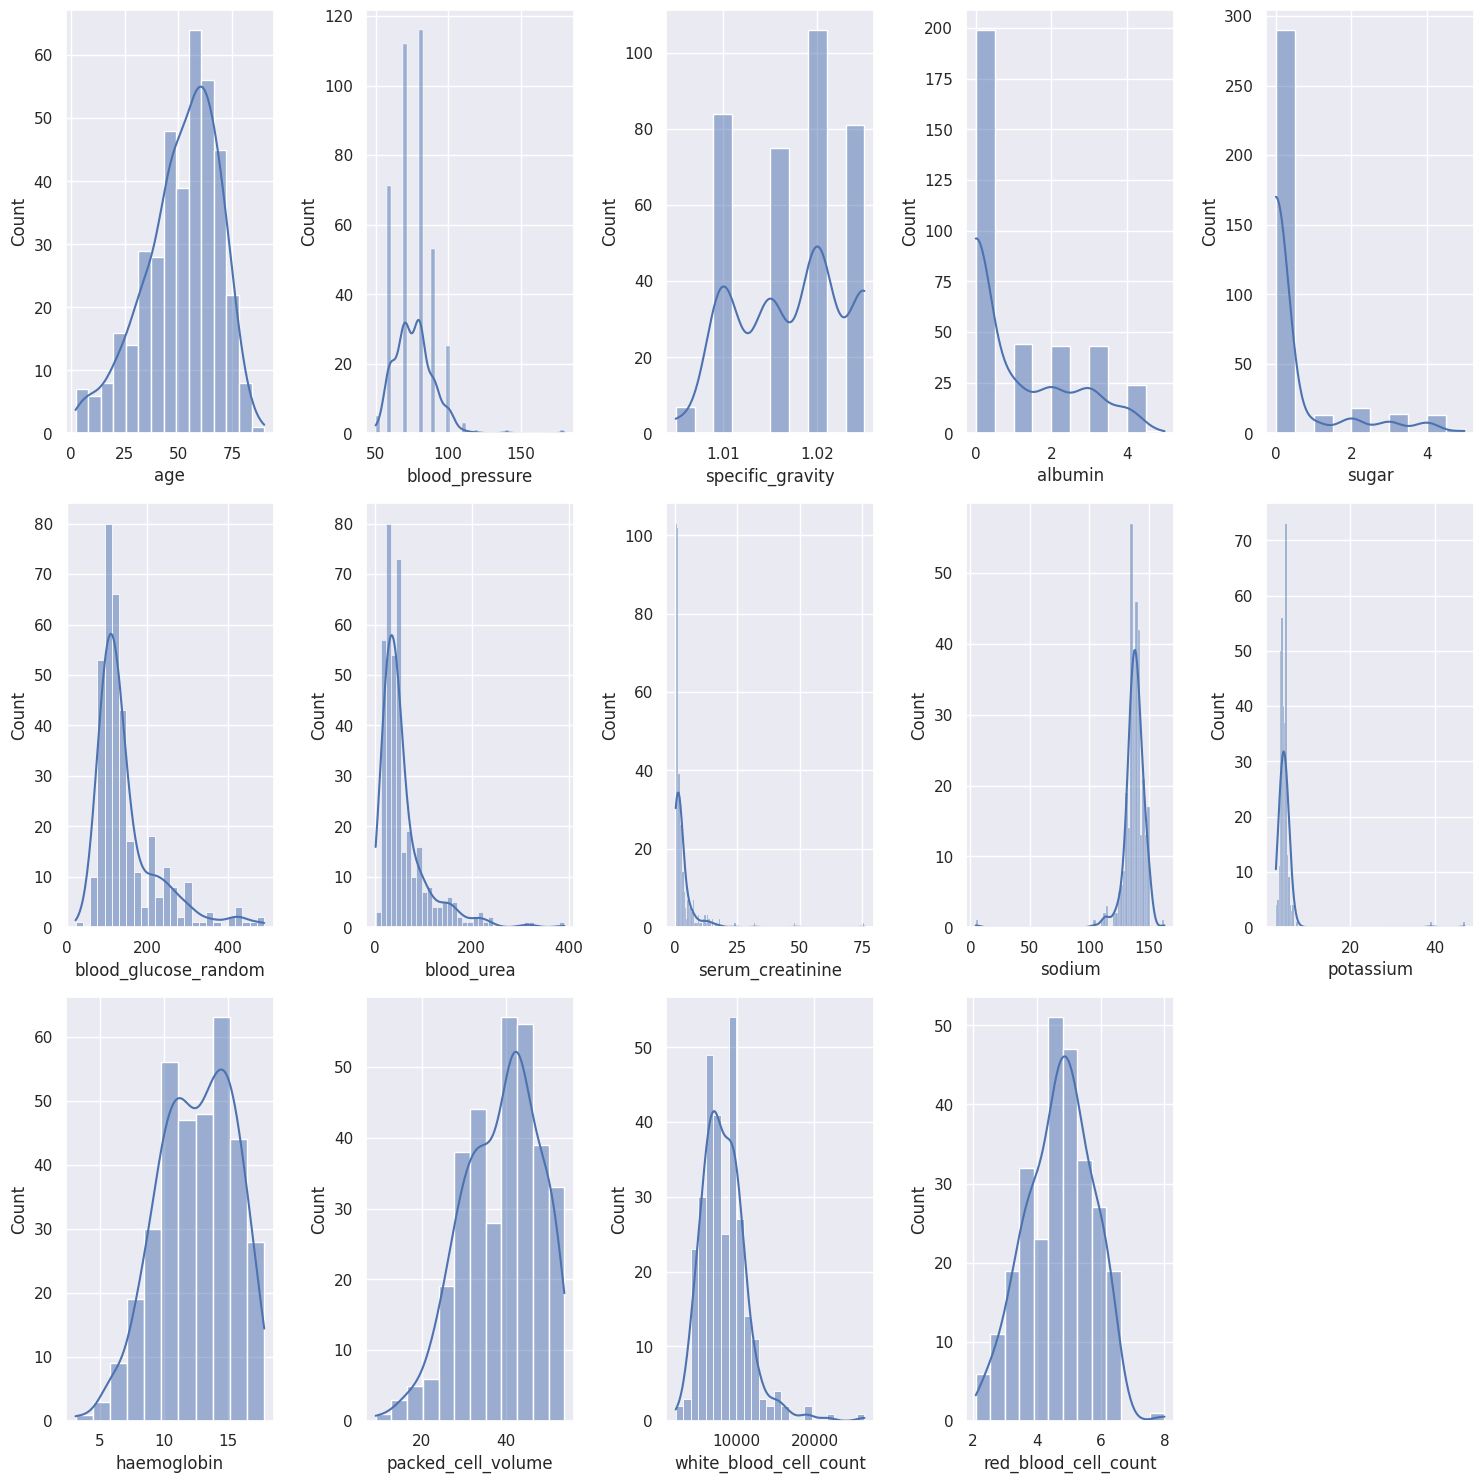

In [67]:
plt.figure(figsize=(15, 15))
plotnumber = 1
for column in numerical_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(data[column], kde=True, ax=ax)
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

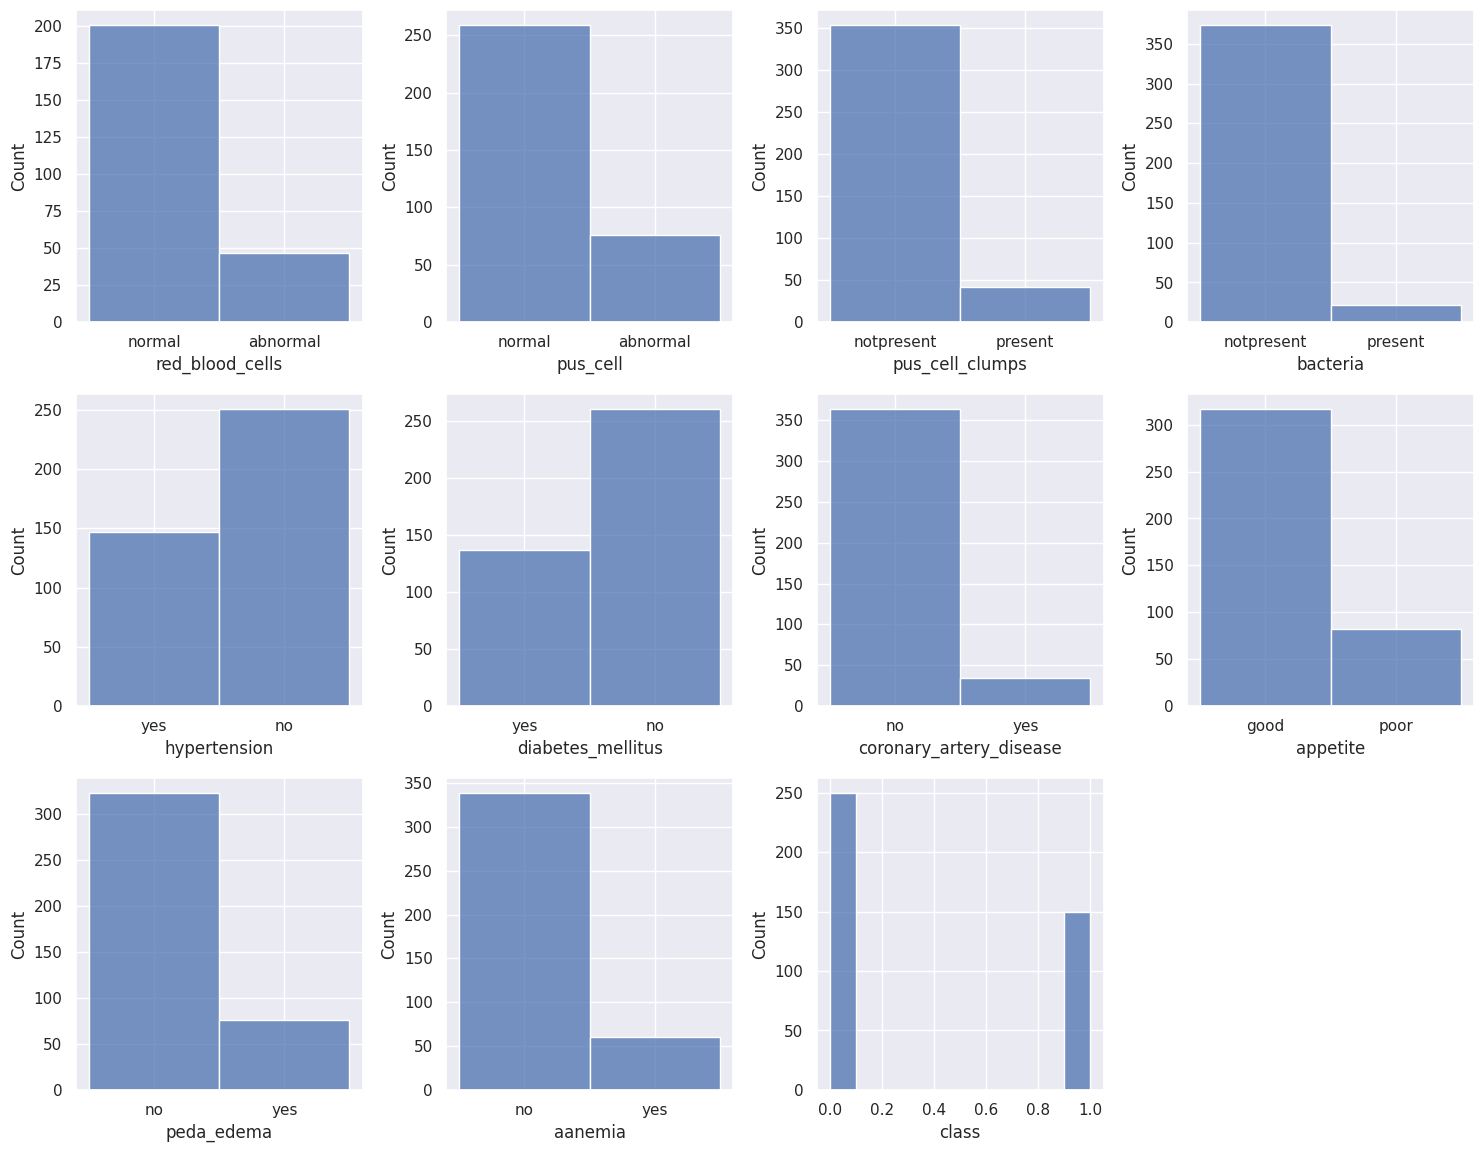

In [68]:
plt.figure(figsize=(15, 15))
plotnumber = 1
for column in categorical_cols:
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(data[column], ax=ax)
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [75]:
numeric_data = data.select_dtypes(include=[np.number])  # Sadece sayısal sütunları seç
correlation_matrix = numeric_data.corr()

In [76]:
correlation_matrix

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,-0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,-0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,-0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,-0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,-0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,-0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,-0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,-0.084541


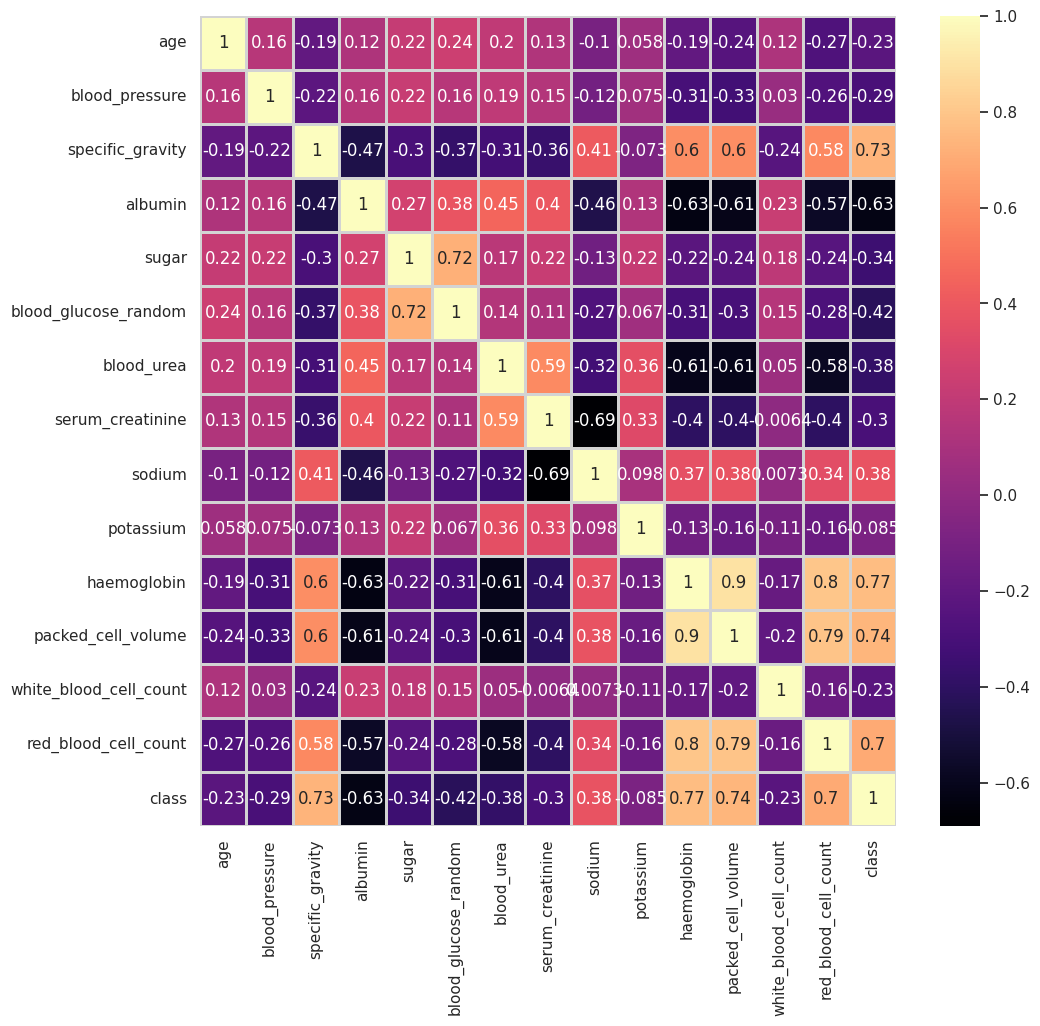

In [80]:
plt.figure(figsize = (10,10))
sns.heatmap(numeric_data.corr(), annot=True, linewidth=2, linecolor = 'lightgray', cmap="magma")
plt.show()

In [91]:
def violin(col):
    fig  = px.violin(data, y=col, x='class', color='class', box=True, template='plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(data, hue='class', height = 6, aspect = 2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter_plot(col1, col2):
    fig  = px.scatter(data, x=col1, y=col2, color="class",  template='plotly_dark')
    return fig.show()

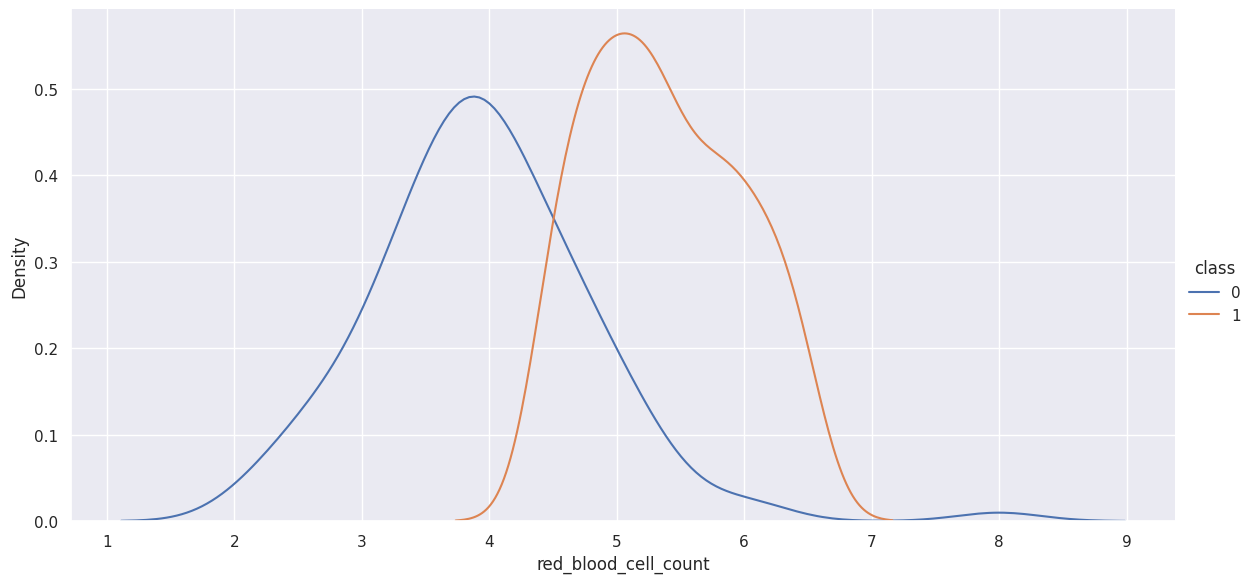

In [92]:
kde('red_blood_cell_count')

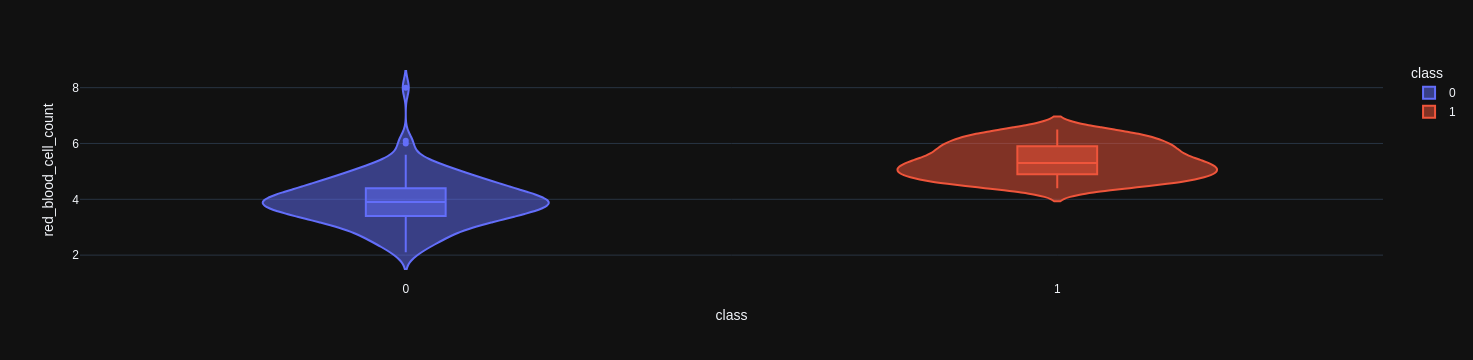

In [93]:
violin('red_blood_cell_count')

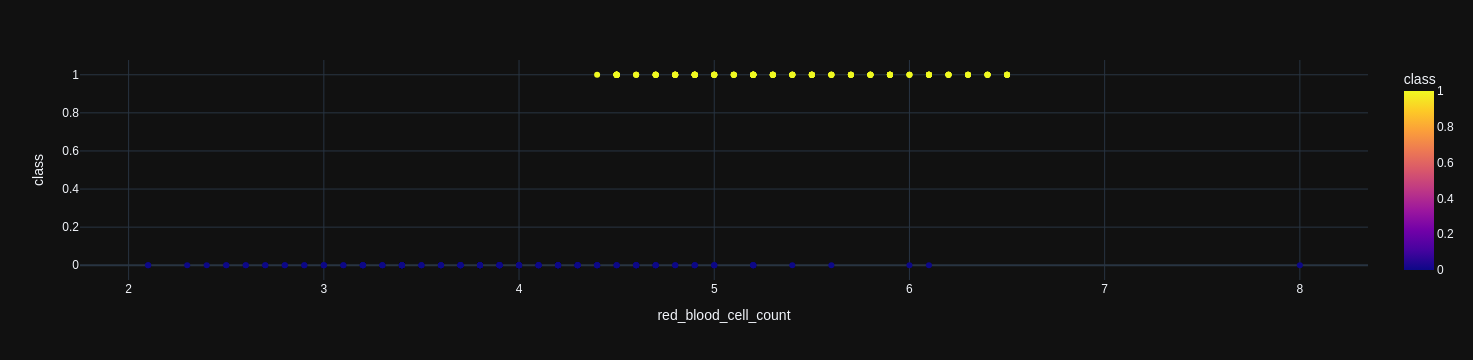

In [96]:
scatter_plot('red_blood_cell_count',"class")

In [97]:
data["class"].value_counts()*100/len(data)

class
0    62.5
1    37.5
Name: count, dtype: float64

In [98]:
data.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [99]:
data[numerical_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [100]:
data[categorical_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [104]:
def random_sampling(feature):
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [105]:
for col in numerical_cols:
    random_sampling(col)

In [107]:
data[numerical_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [108]:
random_sampling('red_blood_cells')
random_sampling('pus_cell')

for col in categorical_cols:
    impute_mode(col)

In [109]:
data[categorical_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [110]:
for col in categorical_cols:
    print(f"{col} has {data[col].unique()}")

red_blood_cells has ['normal' 'abnormal']
pus_cell has ['normal' 'abnormal']
pus_cell_clumps has ['notpresent' 'present']
bacteria has ['notpresent' 'present']
hypertension has ['yes' 'no']
diabetes_mellitus has ['yes' 'no']
coronary_artery_disease has ['no' 'yes']
appetite has ['good' 'poor']
peda_edema has ['no' 'yes']
aanemia has ['no' 'yes']
class has [0 1]


In [111]:
for col in categorical_cols:
    print(f"{col} has {data[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
class has 2


In [113]:
for col in numerical_cols:
    print(f"{col} has {data[col].nunique()}")

age has 76
blood_pressure has 10
specific_gravity has 5
albumin has 6
sugar has 6
blood_glucose_random has 146
blood_urea has 118
serum_creatinine has 84
sodium has 34
potassium has 40
haemoglobin has 115
packed_cell_volume has 42
white_blood_cell_count has 89
red_blood_cell_count has 45


In [112]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,268.0,...,38.0,6000.0,5.6,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,3.0,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [115]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,268.0,...,38.0,6000.0,5.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [116]:
X = data.drop("class", axis = 1)
y = data["class"]

In [118]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,268.0,...,11.3,38.0,6000.0,5.6,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,3.0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [119]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training Accuracy of KNN is 0.79375
Testing Accuracy of KNN is 0.7125


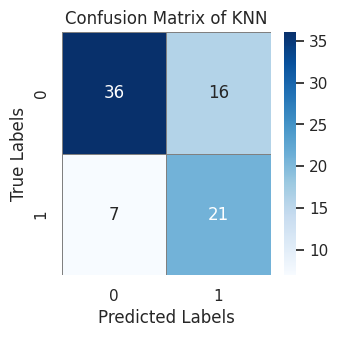

Confusion Matrix of KNN is 
 [[36 16]
 [ 7 21]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        52
           1       0.57      0.75      0.65        28

    accuracy                           0.71        80
   macro avg       0.70      0.72      0.70        80
weighted avg       0.74      0.71      0.72        80



In [123]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")
cm = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of KNN')
plt.show()
print(f"Confusion Matrix of KNN is \n {cm}\n")
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of decision tree is 1.0
Testing Accuracy of decision tree is 0.9875


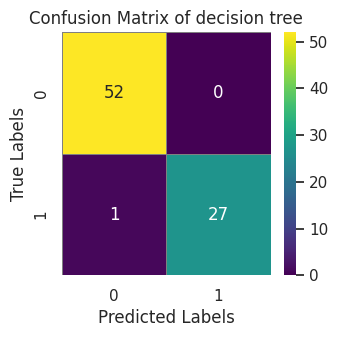

Confusion Matrix of decision tree is 
 [[52  0]
 [ 1 27]]

Classification Report of decision tree is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [143]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(f"Training Accuracy of decision tree is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of decision tree is {accuracy_score(y_test, dtc.predict(X_test))}")
cm = confusion_matrix(y_test, dtc.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of decision tree')
plt.show()
print(f"Confusion Matrix of decision tree is \n {cm}\n")
print(f"Classification Report of decision tree is \n{classification_report(y_test, dtc.predict(X_test))}")

In [144]:
from sklearn.model_selection import GridSearchCV
GRID_PARAMETER = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9],
    "splitter": ["best", "random"],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4, 5],
    "max_features": ["sqrt", "log2"]
}
grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose=1)
grid_search_dtc.fit(X_train, y_train)
print(f"Best Parameters: {grid_search_dtc.best_params_}")
print(f"Best Score: {grid_search_dtc.best_score_}")

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
Best Score: 0.984375


Training Accuracy of decision tree is 0.98125
Testing Accuracy of decision tree is 0.9375


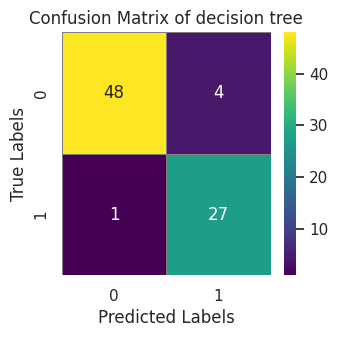

Confusion Matrix of decision tree is 
 [[48  4]
 [ 1 27]]

Classification Report of decision tree is 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [145]:
dtc = grid_search_dtc.best_estimator_
print(f"Training Accuracy of decision tree is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of decision tree is {accuracy_score(y_test, dtc.predict(X_test))}")
cm = confusion_matrix(y_test, dtc.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of decision tree')
plt.show()
print(f"Confusion Matrix of decision tree is \n {cm}\n")
print(f"Classification Report of decision tree is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of random forest is 1.0
Testing Accuracy of random forest is 1.0


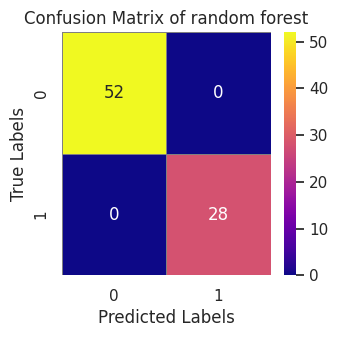

Confusion Matrix of random forest is 
 [[52  0]
 [ 0 28]]

Classification Report of random forest is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [147]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "gini", max_depth = 9, max_features="log2", min_samples_leaf= 2, min_samples_split= 3, n_estimators = 500)
rf.fit(X_train, y_train)
print(f"Training Accuracy of random forest is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Testing Accuracy of random forest is {accuracy_score(y_test, rf.predict(X_test))}")
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of random forest')
plt.show()
print(f"Confusion Matrix of random forest is \n {cm}\n")
print(f"Classification Report of random forest is \n{classification_report(y_test, rf.predict(X_test))}")

Training Accuracy of xgboost is 0.61875
Testing Accuracy of xgboost is 0.65


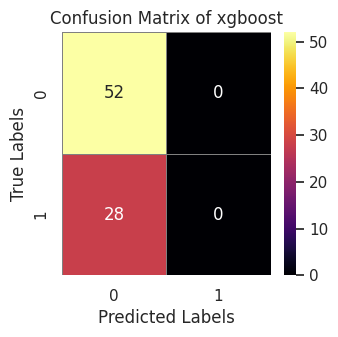

Confusion Matrix of xgboost is 
 [[52  0]
 [28  0]]

Classification Report of xgboost is 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [148]:
#XgBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic", learning_rate = 0.001, max_depth=10, n_estimators=100)
xgb.fit(X_train, y_train)
print(f"Training Accuracy of xgboost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy of xgboost is {accuracy_score(y_test, xgb.predict(X_test))}")
cm = confusion_matrix(y_test, xgb.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of xgboost')
plt.show()
print(f"Confusion Matrix of xgboost is \n {cm}\n")
print(f"Classification Report of xgboost is \n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of logistic regression is 0.884375
Testing Accuracy of logistic regression is 0.925


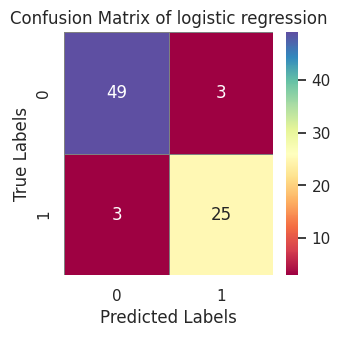

Confusion Matrix of logistic regression is 
 [[49  3]
 [ 3 25]]

Classification Report of logistic regression is 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



In [149]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"Training Accuracy of logistic regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of logistic regression is {accuracy_score(y_test, lr.predict(X_test))}")
cm = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of logistic regression')
plt.show()
print(f"Confusion Matrix of logistic regression is \n {cm}\n")
print(f"Classification Report of logistic regression is \n{classification_report(y_test, lr.predict(X_test))}")

In [150]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm  = SVC(probability=True)
parameter = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 5, 10, 15]
}
grid_search = GridSearchCV(svm, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 5, 10, 15],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [151]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 5, 'gamma': 0.001}
0.740625


In [152]:
svm  = SVC(gamma = 0.001, C  = 5, probability=True)
svm.fit(X_train, y_train)

SVC(C=5, gamma=0.001, probability=True)

Training Accuracy of svm is 0.996875
Testing Accuracy of svm is 0.7625


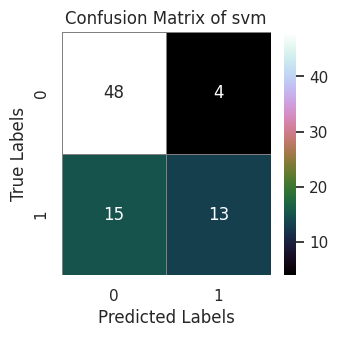

Confusion Matrix of svm is 
 [[48  4]
 [15 13]]

Classification Report of svm is 
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        52
           1       0.76      0.46      0.58        28

    accuracy                           0.76        80
   macro avg       0.76      0.69      0.71        80
weighted avg       0.76      0.76      0.74        80



In [153]:
print(f"Training Accuracy of svm is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Testing Accuracy of svm is {accuracy_score(y_test, svm.predict(X_test))}")
cm = confusion_matrix(y_test, svm.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='cubehelix', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of svm')
plt.show()
print(f"Confusion Matrix of svm is \n {cm}\n")
print(f"Classification Report of svm is \n{classification_report(y_test, svm.predict(X_test))}")

In [154]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
PARAMETERS = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100,150,200,250]
}
grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose= 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=1)

In [155]:
print(grid_search_gbc.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}


In [156]:
print(grid_search_gbc.best_score_)

0.9875


In [157]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

Training Accuracy of gbc is 1.0
Testing Accuracy of gbc is 0.9875


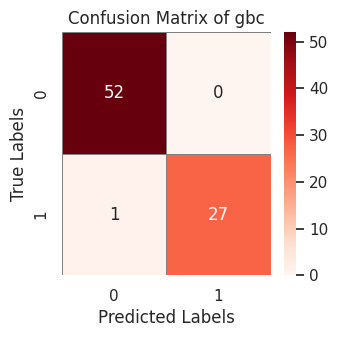

Confusion Matrix of gbc is 
 [[52  0]
 [ 1 27]]

Classification Report of gbc is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [158]:
print(f"Training Accuracy of gbc is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Testing Accuracy of gbc is {accuracy_score(y_test, gbc.predict(X_test))}")
cm = confusion_matrix(y_test, gbc.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of gbc')
plt.show()
print(f"Confusion Matrix of gbc is \n {cm}\n")
print(f"Classification Report of gbc is \n{classification_report(y_test, gbc.predict(X_test))}")

In [161]:
import pickle
model = rf
pickle.dump(model, open("kidney_disease.pkl", 'wb'))

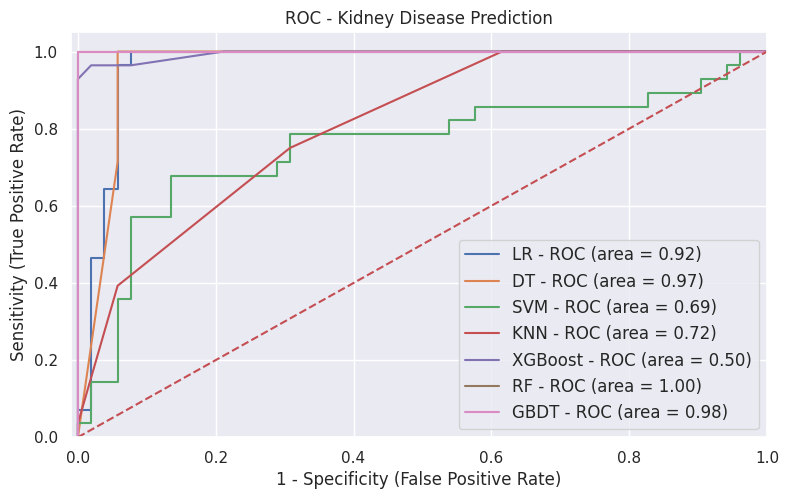

In [162]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()